In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
import soundfile as sf

Generate Mel Spectrogram Image for one audio

mean -2.4669336e-05
std 0.0
Scaled mean -8.897538e-09
Scaled std 1.0


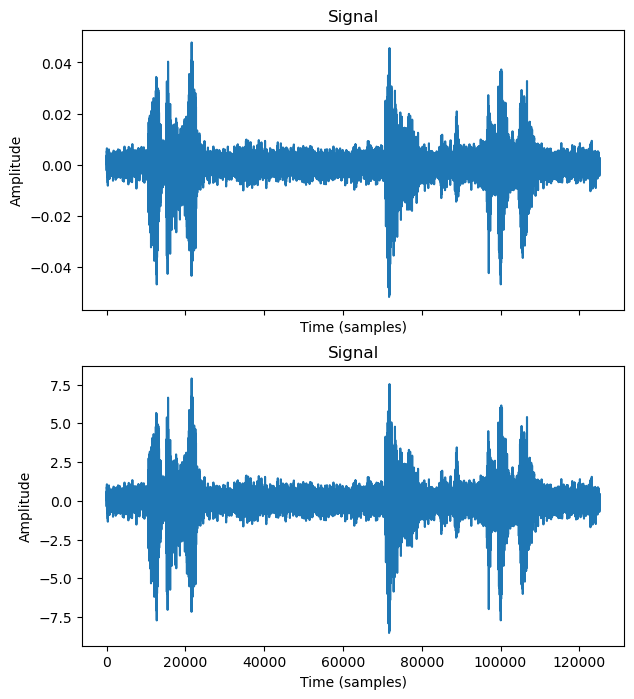

In [3]:
audio_path = '/home/kriti/IEMOCAP_full_release/Session1/sentences/wav/Ses01F_script01_3/Ses01F_script01_3_F003.wav'
workspace = '/home/kriti/ambivalent'
sample_rate = 16000
n_mels = 128

(y, fs) = librosa.core.load(audio_path, sr=sample_rate, mono=True)
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(7, 8))
ax[0].plot(y)
ax[0].set_title('Signal')
ax[0].set(xlabel='Time (samples)', ylabel='Amplitude')
sig_mean = np.mean(y)
sig_std = np.std(y)
print("mean", np.mean(sig_mean))
print("std", np.std(sig_std))

scaled_y = (y - sig_mean) / sig_std
ax[1].plot(scaled_y)
ax[1].set_title('Signal')
ax[1].set(xlabel='Time (samples)', ylabel='Amplitude')
print("Scaled mean", np.mean(scaled_y))
print("Scaled std", np.std(scaled_y))

In [4]:
min_samples = 1 * 16000 
clip_samples = 5 * 16000
sample_rate = 16000
features = []
(y, fs) = librosa.core.load(audio_path, sr=sample_rate, mono=True)
if len(y) <= clip_samples:
    y = librosa.util.pad_center(y, size=clip_samples, mode='constant')
    features.append(y) # (timesteps)
else:
    for start_frame in range(0, len(y), clip_samples):
        end_frame = min(len(y), start_frame + clip_samples)
        seg_y = y[start_frame: end_frame]
        if len(seg_y) < min_samples: # discard segments less than 1 second
            continue
        if len(seg_y) < clip_samples:
            seg_y = librosa.util.pad_center(seg_y, size=clip_samples, mode='constant')
        features.append(seg_y)

for i, feature in enumerate(features):
    sf.write(str(i) + '_test.wav', feature, 16000)

mean 256.19943
std 3572.367
scaled mean 0.0
scaled variance 0.99999994


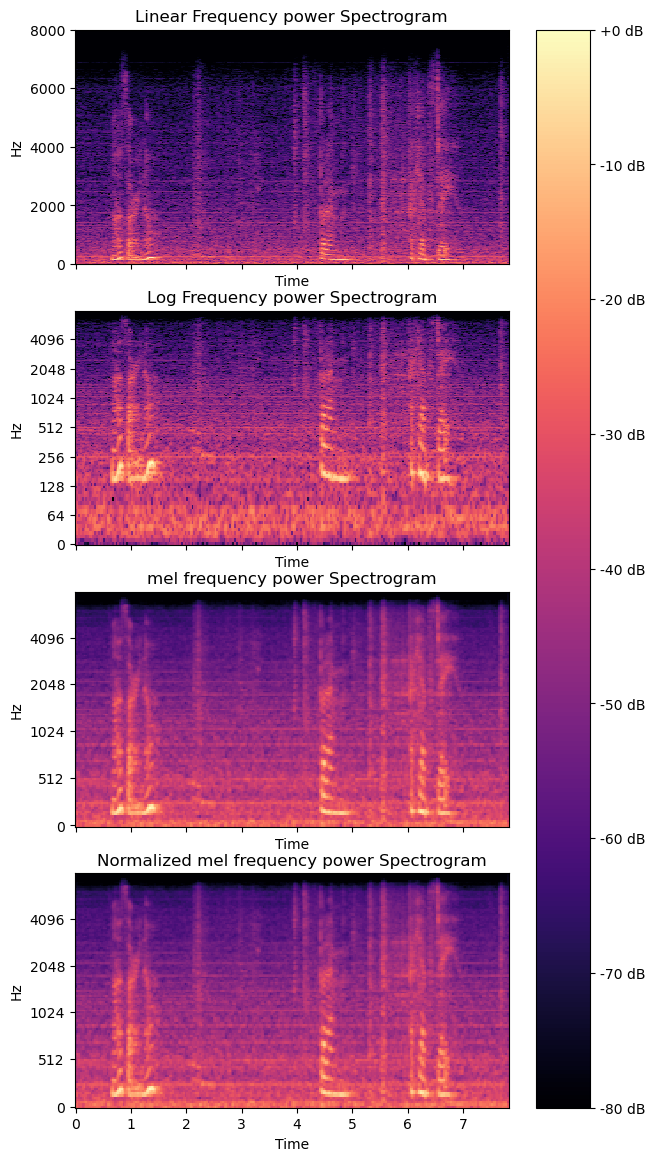

In [5]:
y = scaled_y
spec = np.abs(librosa.stft(y)) # this gives out amplitude 
fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(7, 14))
power_spec = librosa.amplitude_to_db(spec, ref=np.max) # or you can do librosa.power_to_db(spec**2, ref=np.max)

img1 = librosa.display.specshow(power_spec, sr=sample_rate, x_axis='time', y_axis='linear', ax=ax[0])
ax[0].set_title('Linear Frequency power Spectrogram')


librosa.display.specshow(power_spec, sr=sample_rate, x_axis='time', y_axis='log', ax=ax[1])
ax[1].set_title('Log Frequency power Spectrogram')

melspec = librosa.feature.melspectrogram(y=y, sr=sample_rate, n_mels=n_mels) # this gives out power 
power_melspec = librosa.power_to_db(melspec, ref=np.max) 
print("mean", np.mean(melspec))
print("std", np.std(melspec))
melnormalized = (power_melspec - np.mean(power_melspec)) / np.std(power_melspec)

print("scaled mean", np.mean(melnormalized))
print("scaled variance", np.std(melnormalized))

librosa.display.specshow(power_melspec, sr=sample_rate, x_axis='time', y_axis='mel', ax=ax[2])
ax[2].set_title('mel frequency power Spectrogram')

librosa.display.specshow(melnormalized, sr=sample_rate, x_axis='time', y_axis='mel', ax=ax[3], cmap='magma')
ax[3].set_title('Normalized mel frequency power Spectrogram')
fig.colorbar(img1, ax=ax, format='%+2.0f dB')